# **Bloom Filter** 
## 1. What is a Bloom Filter?

  A Bloom filter is a space-efficient probabilistic data structure that is used to test whether an element is a member of a set. For example, checking availability of username is set membership problem, where the set is the list of all registered username. The price we pay for efficiency is that it is probabilistic in nature that means, there might be some False Positive results. False positive means, it might tell that given username is already taken but actually it’s not.

  Interesting Properties of Bloom Filters:  
  *   Unlike a standard hash table, a Bloom filter of a fixed size can represent a set with an arbitrarily large number of elements.
  *   Adding an element never fails. However, the false positive rate increases steadily as elements are added until all bits in the filter are set to 1, at which point all queries yield a positive result.
  *   Bloom filters never generate false negative result, i.e., telling you that a username doesn’t exist when it actually exists.
  *   Deleting elements from filter is not possible because, if we delete a single element by clearing bits at indices generated by k hash functions, it might cause deletion of few other elements. Example – if we delete “geeks” (in given example below) by clearing bit at 1, 4 and 7, we might end up deleting “nerd” also Because bit at index 4 becomes 0 and bloom filter claims that “nerd” is not present.


## 2. Where is it used?  
  *   Weak password detection
  *   Internet Cache Protocol
  *   Wallet synchronization in Bitcoin
  *   Hash based IP Traceback
  *   Cyber security like virus scanning



In [ ]:
# Initially take in a list of 10, 3 letter words. Find the number equivalent of those words
# write the code to take 10 words from the user as input
# Display the corresponding numbers as output
n=list(input("Enter 10 words of three letters with space to seperate : ").split(" "))
j=[]
for each in n:
  cs=0
  for c in each:
    cs+=int(str(ord(c)))
  j.append(cs)
print(j)

# zuz zax zek fez fiz pyx wiz biz zap zep


Enter 10 words of three letters with space to seperate : zuz zax zek fez fiz pyx wiz biz zap zep
[361, 339, 330, 325, 329, 353, 346, 325, 331, 335]


**Hash Functions**
Consider two hash functions 
1. Rollno*element 
2. (Rollno*2-1) * element
3. For each element obtained from step 1 display the hashed value. 

In [ ]:

import numpy as np
l=np.array(j)
hash1=l*19
h1=hash1
h2=(19*2-1)*l
print("Hash1 : ",*h1)
print("Hash2 : ",*h2)
h1s=h1%32
h2s=h2%32

Hash1 :  6859 6441 6270 6175 6251 6707 6574 6175 6289 6365
Hash2 :  13357 12543 12210 12025 12173 13061 12802 12025 12247 12395


Using a filter of N=12, after obtaining the output of hash values, flip the filter from 0 to 1 according to outputs of hashfunctions. h1mod11 and h2mod11

In [ ]:
from prettytable import PrettyTable
table = PrettyTable(['Stream_element', 'h1', 'h2',"filter_contents"])
filter_content=[0]*33
# used for answer verification at last
string_ints=[]
for i in range(10):
  filter_content[h1s[i]]=1
  filter_content[h2s[i]]=1
  string_ints = [str(ints) for ints in filter_content]
  row=[l[i],h1s[i],h2s[i],"".join(string_ints)]
  table.add_row(row)
print(table)
print(string_ints)
# Display the output of the bloom filter 

+----------------+----+----+-----------------------------------+
| Stream_element | h1 | h2 |          filter_contents          |
+----------------+----+----+-----------------------------------+
|      361       | 11 | 13 | 000000000001010000000000000000000 |
|      339       | 9  | 31 | 000000000101010000000000000000010 |
|      330       | 30 | 18 | 000000000101010000100000000000110 |
|      325       | 31 | 25 | 000000000101010000100000010000110 |
|      329       | 11 | 13 | 000000000101010000100000010000110 |
|      353       | 19 | 5  | 000001000101010000110000010000110 |
|      346       | 14 | 2  | 001001000101011000110000010000110 |
|      325       | 31 | 25 | 001001000101011000110000010000110 |
|      331       | 17 | 23 | 001001000101011001110001010000110 |
|      335       | 29 | 11 | 001001000101011001110001010001110 |
+----------------+----+----+-----------------------------------+
['0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1',

For checking the false positives, take 5 random integers and check if the elements have passed the filter, havent passed the filter or false positive.If after hashing and checking in the last bit stream positions, if the hashed outputs of both the hash functions turn out to be 1 then it is either false positive or the elements has passed through the filter.If one or both positions are zero it means that the elements have not passed through the filter.

In [ ]:
#Code for testing 
n1=list(map(int,input("Enter 3-digit number seperated by space").split()))
check_arr=np.array(n1)
h1=check_arr*19
h2=(19*2-1)*check_arr
print("Hash1 : ",*h1)
print("Hash2 : ",*h2)
h1s=h1%32
h2s=h2%32
table1 = PrettyTable(['Stream_element', 'h1', 'h2',"Check"])

for i in range(len(n1)):
  x=1
  y=1
  if (string_ints[h1s[i]]=="1" and x==1) and (string_ints[h2s[i]]=="1" and y==1):
    out="already exists"
  elif (string_ints[h1s[i]]=="0" and x==0) and (string_ints[h2s[i]]=="0" and y==0):
    out="True_Negative"
  elif (string_ints[h1s[i]]=="0" and x==1) and (string_ints[h2s[i]]=="0" and y==1):
    out="Passed through the filter/false positive"
  else:
    out="Not passed"
  row=[check_arr[i],h1s[i],h2s[i],out]
  row=[check_arr[i],string_ints[h1s[i]],string_ints[h2s[i]],out]
  table1.add_row(row)
print(table1)
#input


#194 567 854 856 970 210 200 400 360 331 900

#361 339 330 325 329 353 346 325 331 335

Enter 3-digit number seperated by space194 567 854 856 970 210 200 400 360 331 900
Hash1 :  3686 10773 16226 16264 18430 3990 3800 7600 6840 6289 17100
Hash2 :  7178 20979 31598 31672 35890 7770 7400 14800 13320 12247 33300
+----------------+----+----+------------------------------------------+
| Stream_element | h1 | h2 |                  Check                   |
+----------------+----+----+------------------------------------------+
|      194       | 0  | 0  | Passed through the filter/false positive |
|      567       | 0  | 1  |                Not passed                |
|      854       | 1  | 1  |              already exists              |
|      856       | 0  | 0  | Passed through the filter/false positive |
|      970       | 1  | 1  |              already exists              |
|      210       | 0  | 0  | Passed through the filter/false positive |
|      200       | 0  | 0  | Passed through the filter/false positive |
|      400       | 0  | 0  | Passed through the filter/f

**Conclusion**: Successfully implemented a Bloom Filter.
In this experiment, we learnt about bloom filter. Bloom filters are probabilistic space-efficient data structures.They are very similar to hashtables; they are used exclusively membership existence in a set. We implemented the bloom filter algorith and successfully got the output.

Probability of False positivity: 

Let m be the size of bit array, k be the number of hash functions and n be the number of expected elements to be inserted in the filter, then the probability of false positive p can be calculated as:
*   P=\left ( 1-\left [ 1- \frac {1}{m} \right ]^{kn} \right )^k

Size of Bit Array: 

If expected number of elements n is known and desired false positive probability is p then the size of bit array m can be calculated as : 

*   m= -\frac {n\ln P}{(ln 2)^2}    
 
Optimum number of hash functions: 

The number of hash functions k must be a positive integer. If m is size of bit array and n is number of elements to be inserted, then k can be calculated as : 

*  k= \frac {m}{n} ln 2







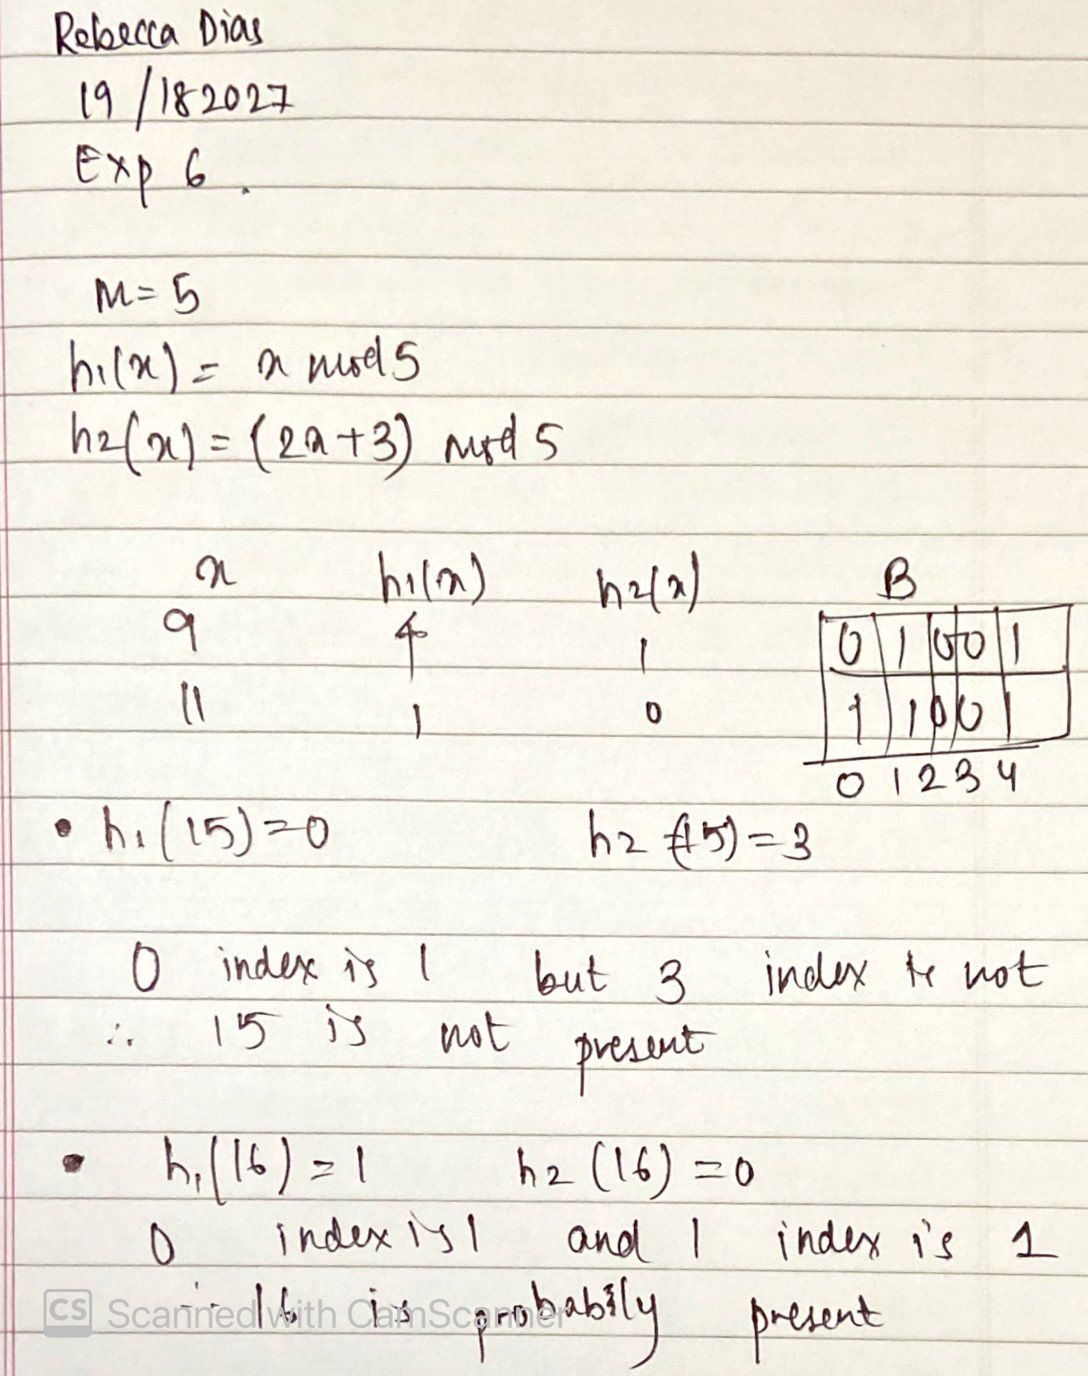